<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.990213  48.400385  28.304719 -0.407771  173.287546   
      1.0    62.515146  99.611584  39.834445 -1.111637  210.849538   
      2.0    93.821643  54.886906  93.562132 -0.414918  251.855763   
      3.0    85.809941  94.205691  49.024931 -0.767991  238.272573   
      4.0    86.982091  49.438096  99.022522 -0.431835  245.010873   
...                ...        ...        ...       ...         ...   
999.0 115.0  99.547227  37.961952  97.556931 -0.212500  244.853609   
      116.0  53.526659  92.909308  79.071552  1.499344  237.006863   
      117.0  77.416154  91.005536  58.765486  0.614874  237.802049   
      118.0  92.294437  47.592520  85.341210  0.954626  236.182794   
      119.0  69.303118  63.052722  29.290143  0.214123  171.860106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.448906 -0.161360  
      1.0    212.002642 -1.153104  
      2.0    252.165626 -0.309863  
      3.0    239.028738 -0.756165  
      4.0    245.339994 -0.329121  
...                 ...       ...  
999.0 115.0  244.914464 -0.060855  
      116.0  235.694910  1.311954  
      117.0  237.353194  0.448856  
      118.0  235.130400  1.052394  
      119.0  171.609816  0.250290  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.990213  48.400385  28.304719 -0.407771  173.287546   
      1.0    62.515146  99.611584  39.834445 -1.111637  210.849538   
      2.0    93.821643  54.886906  93.562132 -0.414918  251.855763   
      3.0    85.809941  94.205691  49.024931 -0.767991  238.272573   
      4.0    86.982091  49.438096  99.022522 -0.431835  245.010873   
...                ...        ...        ...       ...         ...   
999.0 115.0  99.547227  37.961952  97.556931 -0.212500  244.853609   
      116.0  53.526659  92.909308  79.071552  1.499344  237.006863   
      117.0  77.416154  91.005536  58.765486  0.614874  237.802049   
      118.0  92.294437  47.592520  85.341210  0.954626  236.182794   
      119.0  69.303118  63.052722  29.290143  0.214123  171.860106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.448906 -0.161360  
      1.0    212.002642 -1.153104  
      2.0    252.165626 -0.309863  
      3.0    239.028738 -0.756165  
      4.0    245.339994 -0.329121  
...                 ...       ...  
999.0 115.0  244.914464 -0.060855  
      116.0  235.694910  1.311954  
      117.0  237.353194  0.448856  
      118.0  235.130400  1.052394  
      119.0  171.609816  0.250290  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.990213  48.400385  28.304719 -0.407771  173.287546   
      1.0    62.515146  99.611584  39.834445 -1.111637  210.849538   
      2.0    93.821643  54.886906  93.562132 -0.414918  251.855763   
      3.0    85.809941  94.205691  49.024931 -0.767991  238.272573   
      4.0    86.982091  49.438096  99.022522 -0.431835  245.010873   
...                ...        ...        ...       ...         ...   
999.0 115.0  99.547227  37.961952  97.556931 -0.212500  244.853609   
      116.0  53.526659  92.909308  79.071552  1.499344  237.006863   
      117.0  77.416154  91.005536  58.765486  0.614874  237.802049   
      118.0  92.294437  47.592520  85.341210  0.954626  236.182794   
      119.0  69.303118  63.052722  29.290143  0.214123  171.860106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.448906 -0.161360  
      1.0    212.002642 -1.153104  
      2.0    252.165626 -0.309863  
      3.0    239.028738 -0.756165  
      4.0    245.339994 -0.329121  
...                 ...       ...  
999.0 115.0  244.914464 -0.060855  
      116.0  235.694910  1.311954  
      117.0  237.353194  0.448856  
      118.0  235.130400  1.052394  
      119.0  171.609816  0.250290  

[120000 rows x 7 columns]

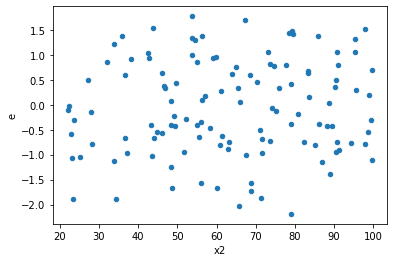

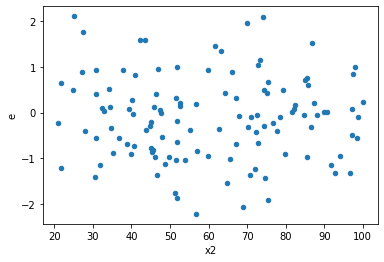

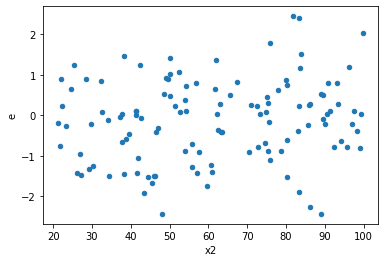

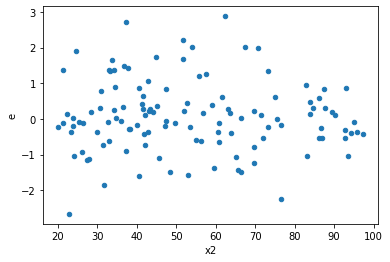

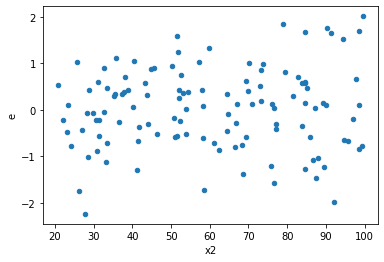

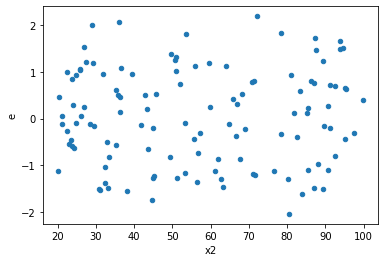

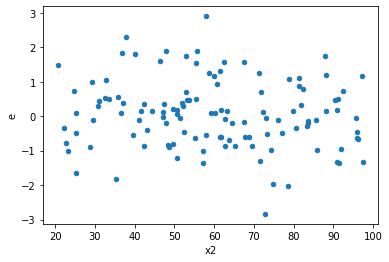

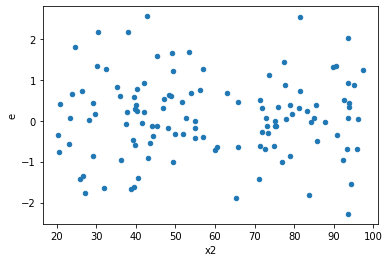

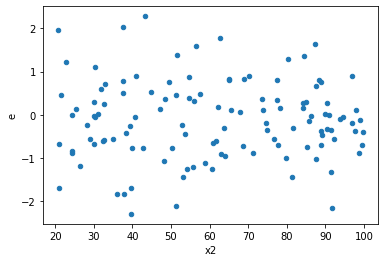

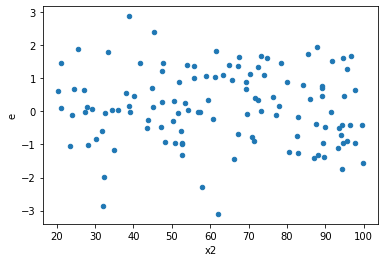

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,60.0,54.0,42.05218775358701,51.74050309766368,0.7008697958931169,0.9581574647715496,1.367097669761288,0.24467863985791216,0.8776606800710439,0.12233931992895608,Reject001=1 : Homoscedasticity
7.0,75.0,39.0,55.96185322569699,41.14485182731463,0.7461580430092932,1.0549962007003753,1.413904481208193,0.2376959647162764,0.8811520176418618,0.1188479823581382,Reject001=1 : Homoscedasticity
8.0,56.0,58.0,47.29358080490416,49.00828742485272,0.8445282286590029,0.8449704728422882,1.0005236582606452,0.9971909027276269,0.5014045486361866,0.49859545136381345,Reject001=1 : Homoscedasticity
10.0,58.0,56.0,49.69975059561074,58.328859797877705,0.856892251648461,1.041586782104959,1.215539970283532,0.4648192617999505,0.7675903691000248,0.23240963089997524,Reject001=1 : Homoscedasticity
12.0,56.0,58.0,52.92102345502328,68.95123819185675,0.9450182759825586,1.1888144515837369,1.2579803817526147,0.3877871380737141,0.8061064309631429,0.19389356903685706,Reject001=1 : Homoscedasticity
16.0,52.0,62.0,55.98516150385419,76.81218882688161,1.0766377212279652,1.2389062714013164,1.1507178756362677,0.5931721189130166,0.7034139405434917,0.2965860594565083,Reject001=1 : Homoscedasticity
18.0,47.0,67.0,28.53304641193231,69.90674314075656,0.6070860938709003,1.0433842259814412,1.7186758789492578,0.04142049203370468,0.9792897539831477,0.02071024601685234,Reject001=1 : Homoscedasticity
31.0,49.0,65.0,45.42554606692532,86.04362132794414,0.9270519605494963,1.32374802042991,1.42791135423011,0.17841596595694398,0.910792017021528,0.08920798297847199,Reject001=1 : Homoscedasticity
34.0,57.0,57.0,64.74942890821845,65.72576874572415,1.1359548931266394,1.1530836622056868,1.0150787405227875,0.9551437504655014,0.5224281247672493,0.4775718752327507,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,54.0,60.98341504702223,44.9955160897852,1.0163902507837037,0.8332502979589852,0.8198133515315543,0.45263574843176646,Reject001=1 : Homoscedasticity
1.0,60.0,54.0,42.05218775358701,51.74050309766368,0.7008697958931169,0.9581574647715496,1.367097669761288,0.24467863985791216,Reject001=1 : Homoscedasticity
2.0,59.0,55.0,61.790450095813036,52.22673648768893,1.047295764335814,0.9495770270488897,0.9066942304031023,0.7105235949565647,Reject001=1 : Homoscedasticity
3.0,48.0,66.0,55.529980993356205,56.49897310349636,1.1568746040282543,0.8560450470226721,0.7399635570198454,0.27452664719830305,Reject001=1 : Homoscedasticity
4.0,57.0,57.0,40.9690927856133,40.17135271575949,0.7187560137826895,0.7047605739606928,0.9805282466461169,0.9410868664583104,Reject001=1 : Homoscedasticity
5.0,67.0,47.0,73.56175372788425,46.75053084152772,1.0979366228042426,0.9946921455644195,0.905964993702345,0.702356807702638,Reject001=1 : Homoscedasticity
6.0,69.0,45.0,72.44326825549652,38.91581339164931,1.0499024384854567,0.8647958531477624,0.8236916321437248,0.461748957547709,Reject001=1 : Homoscedasticity
7.0,75.0,39.0,55.96185322569699,41.14485182731463,0.7461580430092932,1.0549962007003753,1.413904481208193,0.2376959647162764,Reject001=1 : Homoscedasticity
8.0,56.0,58.0,47.29358080490416,49.00828742485272,0.8445282286590029,0.8449704728422882,1.0005236582606452,0.9971909027276269,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64